In [1]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os
import struct
from PIL import Image
import math
import cv2

In [2]:
def getDVSeventsDavis(file, ROI=np.array([]), numEvents=1e10, startEvent=0):
    print('\ngetDVSeventsDavis function called \n')
    sizeX = 346
    sizeY = 260
    x0 = 0
    y0 = 0
    x1 = sizeX
    y1 = sizeY
    if len(ROI) != 0:
        if len(ROI) == 4:
            print('Region of interest specified')
            x0 = ROI(0)
            y0 = ROI(1)
            x1 = ROI(2)
            y1 = ROI(3)
        else:
            print(
                'Unknown ROI argument. Call function as: \n getDVSeventsDavis(file, ROI=[x0, y0, x1, y1], numEvents=nE, startEvent=sE) '
                'to specify ROI or\n getDVSeventsDavis(file, numEvents=nE, startEvent=sE) to not specify ROI')
            return

    else:
        print('No region of interest specified, reading in entire spatial area of sensor')

    print('Reading in at most', str(numEvents))
    print('Starting reading from event', str(startEvent))

    triggerevent = int('400', 16)
    polmask = int('800', 16)
    xmask = int('003FF000', 16)
    ymask = int('7FC00000', 16)
    typemask = int('80000000', 16)
    typedvs = int('00', 16)
    xshift = 12
    yshift = 22
    polshift = 11
    x = []
    y = []
    ts = []  # Timestamps tick is 1 us
    pol = []
    numeventsread = 0

    length = 0
    aerdatafh = open(file, 'rb')
    k = 0
    p = 0
    statinfo = os.stat(file)
    if length == 0:
        length = statinfo.st_size
    print("file size", length)

    lt = aerdatafh.readline()
    while lt and str(lt)[2] == "#":
        p += len(lt)
        k += 1
        lt = aerdatafh.readline()
        continue

    aerdatafh.seek(p)
    tmp = aerdatafh.read(8)
    p += 8
    while p < length:
        ad, tm = struct.unpack_from('>II', tmp)
        ad = abs(ad)
        if (ad & typemask) == typedvs:
            xo = sizeX - 1 - float((ad & xmask) >> xshift)
            yo = float((ad & ymask) >> yshift)
            polo = 1 - float((ad & polmask) >> polshift)
            if xo >= x0 and xo < x1 and yo >= y0 and yo < y1:
                x.append(xo)
                y.append(yo)
                pol.append(polo)
                ts.append(tm)
        aerdatafh.seek(p)
        tmp = aerdatafh.read(8)
        p += 8
        numeventsread += 1

    ts[:] = [x - ts[0] for x in ts]  # absolute time -> relative time
    x[:] = [int(a) for a in x]
    y[:] = [int(a) for a in y]

    print('Total number of events read =', numeventsread)
    print('Total number of DVS events returned =', len(ts))

    return ts, x, y, pol

In [3]:
def get_vote(e_x, e_y, r, e_theta_degree, a_degree):
    x1 = e_x + r * math.cos(math.radians(e_theta_degree + a_degree)) 
    y1 = e_y + r * math.sin(math.radians(e_theta_degree + a_degree)) 
    
    x2 = e_x + r * math.cos(math.radians(e_theta_degree - a_degree)) 
    y2 = e_y + r * math.sin(math.radians(e_theta_degree - a_degree)) 
    
    x3 = e_x + r * math.cos(math.radians(e_theta_degree + a_degree)) 
    y3 = e_y - r * math.sin(math.radians(e_theta_degree + a_degree))  
    
    x4 = e_x + r * math.cos(math.radians(e_theta_degree - a_degree)) 
    y4 = e_y - r * math.sin(math.radians(e_theta_degree - a_degree))   
    
    
    x5 = e_x - r * math.cos(math.radians(e_theta_degree + a_degree)) 
    y5 = e_y + r * math.sin(math.radians(e_theta_degree + a_degree)) 
    
    x6 = e_x - r * math.cos(math.radians(e_theta_degree - a_degree)) 
    y6 = e_y + r * math.sin(math.radians(e_theta_degree - a_degree)) 
    
    x7 = e_x - r * math.cos(math.radians(e_theta_degree + a_degree)) 
    y7 = e_y - r * math.sin(math.radians(e_theta_degree + a_degree))  
    
    x8 = e_x - r * math.cos(math.radians(e_theta_degree - a_degree)) 
    y8 = e_y - r * math.sin(math.radians(e_theta_degree - a_degree))
    
    return [(int(x1), int(y1), r), (int(x2), int(y2), r), (int(x3), int(y3), r), (int(x4), int(y4), r), 
            (int(x5), int(y5), r), (int(x6), int(y6), r), (int(x7), int(y7), r), (int(x8), int(y8), r)]
#     return [(int(x1), int(y1), r)]

In [4]:
file_path = "../raw_data/dvs/Davis346redColor-2019-03-11Ts08-em.aedat"

In [5]:
ts, x, y, pol = getDVSeventsDavis(file_path)


getDVSeventsDavis function called 

No region of interest specified, reading in entire spatial area of sensor
Reading in at most 10000000000.0
Starting reading from event 0
file size 12233996
Total number of events read = 1493118
Total number of DVS events returned = 1493118


In [6]:
ts_np = np.array(ts)
x_np = np.array(x)
y_np = np.array(y)
pol_np = np.array(pol)

In [7]:
print(len(ts_np), len(x_np), len(y_np), len(pol_np))

1493118 1493118 1493118 1493118


In [125]:
# 绘制3d分布图片
start_event_number = 384892
# start_event_number = 429892
event_number_delta = 1500

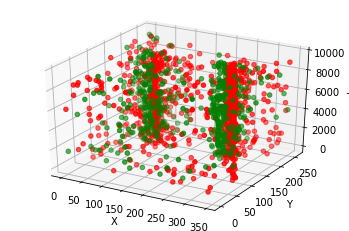

In [126]:
x_plt = x_np[start_event_number:start_event_number + event_number_delta]
y_plt = y_np[start_event_number:start_event_number + event_number_delta]
t_plt = ts_np[start_event_number:start_event_number + event_number_delta]
p_plt = pol_np[start_event_number:start_event_number + event_number_delta]

t_plt = t_plt - t_plt[0]

p_plt_bool_pos = p_plt.astype(bool)
p_plt_bool_neg = ~p_plt_bool_pos

x_plt_pos = x_plt[p_plt_bool_pos]
x_plt_neg = x_plt[p_plt_bool_neg]

y_plt_pos = y_plt[p_plt_bool_pos]
y_plt_neg = y_plt[p_plt_bool_neg]

t_plt_pos = t_plt[p_plt_bool_pos]
t_plt_neg = t_plt[p_plt_bool_neg]



x, y, z = x_plt, y_plt, t_plt
ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度
# ax.scatter(x[:10], y[:10], z[:10], c='y')  # 绘制数据点
# ax.scatter(x[10:20], y[10:20], z[10:20], c='r')
# ax.scatter(x[30:40], y[30:40], z[30:40], c='g')

# ax.scatter(x[:10], y[:10], z[:10], c='y')  # 绘制数据点
ax.scatter(x_plt_neg, y_plt_neg, t_plt_neg, c='r')
ax.scatter(x_plt_pos, y_plt_pos, t_plt_pos, c='g')


ax.set_zlabel('T')  # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()
plt.close()

In [127]:
# 绘制对应眼动图片
Width = 346
Height = 260

gen_img = np.zeros([Height, Width, 3], dtype=np.uint8)
# for step in range(event_number_delta):
#     if p_plt[step] == 0:
#         gen_img[Height - y_plt[step] - 1][Width - x_plt[step] - 1] = [34,34,178]
#     else:
#         gen_img[Height - y_plt[step] - 1][Width - x_plt[step] - 1] = [152,251,152]
gen_img = np.zeros([Height, Width, 3], dtype=np.uint8)
for step in range(event_number_delta):
    if p_plt[step] == 0:
        gen_img[y_plt[step]][x_plt[step]] = [152,251,152]
    else:
        gen_img[y_plt[step]][x_plt[step]] = [34,34,178]

In [128]:
# new_im = Image.fromarray(gen_img)
# new_im.show()
# new_im.close()

# cv2.imshow('img',gen_img) 
# cv2.waitKey(0)  
# cv2.destroyAllWindows()  
# cv2.flip(gen_img, 0)

# flip 进行上下翻转
gen_img_flip = cv2.flip(gen_img, 0)
cv2.imshow('img',gen_img_flip) 
cv2.waitKey(0)  
cv2.destroyAllWindows()  

In [129]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

# x_plt
# y_plt 
# t_plt 

clf_x = np.c_[np.reshape(x_plt, (-1, 1)), np.reshape(y_plt, (-1, 1))]
clf_y = np.reshape(t_plt, (-1, 1))
clf.fit(clf_x, clf_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [130]:
print(clf.coef_)
print(clf.intercept_)

[[0.48137085 3.54345285]]
[4102.32712652]


In [131]:
# clf.coef_[]

In [132]:
# np.shape(x_plt)
# print(np.c_[np.reshape(x_plt, (-1, 1)), np.reshape(y_plt, (-1, 1))][:10])
# print(x_plt[:10])
# print(y_plt[:10])

solution:
0.481371 x + 3.543453 y + 4102.327127 = z
errors:
[[-4326.57962685]
 [-4844.96982608]
 [-4772.95467746]
 ...
 [ 4754.34463431]
 [ 5172.57733965]
 [ 4716.88403679]]
residual:
107153.32867380934


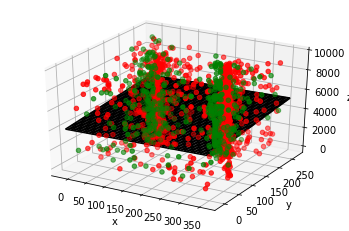

In [133]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# plot raw data
plt.figure()
ax = plt.subplot(111, projection='3d')
# ax.scatter(x, y, z, color='b')
ax.scatter(x_plt_neg, y_plt_neg, t_plt_neg, c='r')
ax.scatter(x_plt_pos, y_plt_pos, t_plt_pos, c='g')


#===========================================================
# print ("solution:")
# print ("%f x + %f y + %f = z" % (clf.coef_[0][0], clf.coef_[0][1], clf.intercept_[0]))
# print ("errors:")
# print (errors)
# print ("residual:")
# print (residual)

# # plot plane
# xlim = ax.get_xlim()
# ylim = ax.get_ylim()
# X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),
#                   np.arange(ylim[0], ylim[1]))
# Z = np.zeros(X.shape)
# for r in range(X.shape[0]):
#     for c in range(X.shape[1]):
#         Z[r,c] = clf.coef_[0][0] * X[r,c] + clf.coef_[0][1] * Y[r,c] + clf.intercept_[0]
# ax.plot_wireframe(X,Y,Z, color='k')


#===================================================
# x, y, z
# do fit
tmp_A = []
tmp_b = []
for i in range(len(x)):
    tmp_A.append([x[i], y[i], 1])
    tmp_b.append(z[i])
b = np.matrix(tmp_b).T
A = np.matrix(tmp_A)
fit = (A.T * A).I * A.T * b
errors = b - A * fit
residual = np.linalg.norm(errors)

print ("solution:")
print ("%f x + %f y + %f = z" % (fit[0], fit[1], fit[2]))
print ("errors:")
print (errors)
print ("residual:")
print (residual)

# plot plane
xlim = ax.get_xlim()
ylim = ax.get_ylim()
X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),
                  np.arange(ylim[0], ylim[1]))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]
ax.plot_wireframe(X,Y,Z, color='k')
#=========================================================

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()
plt.close()

In [134]:
e_theta = math.atan(fit[1]/fit[0])
print(e_theta)
print(math.degrees(e_theta))
e_theta_degree = math.degrees(e_theta)
delta_degree = 10
# math.radians(e_theta_degree)

1.4357749084047595
82.26384258237506


In [112]:
# print(x_plt_neg)

In [113]:
voting_dict = {}
radius_min = 20
radius_max = 30
radius_delta = 1
radius_np = np.arange(radius_min, radius_max, radius_delta)
# x, y, z = x_plt, y_plt, t_plt
for point in range(event_number_delta):
    for radius in radius_np:
        voting = get_vote(x_plt[point], y_plt[point], radius, e_theta_degree, delta_degree)
        for vote in voting:
            if vote[0] >= 0 and vote[0] < 346 and vote[1] >= 0 and vote[1] < 260:
                if vote in voting_dict.keys():
                    voting_dict[vote] = voting_dict[vote] + 1
                else:
                    voting_dict[vote] = 1

In [114]:
sorted_voting_dict = sorted(voting_dict.items(), key=lambda voting_dict:voting_dict[1], reverse=True)
sorted_voting_dict

[((258, 152, 22), 7),
 ((256, 194, 23), 6),
 ((80, 145, 27), 6),
 ((255, 183, 24), 6),
 ((257, 190, 24), 6),
 ((71, 142, 24), 6),
 ((253, 152, 28), 6),
 ((261, 198, 28), 6),
 ((253, 151, 29), 6),
 ((252, 193, 27), 6),
 ((258, 191, 25), 6),
 ((259, 194, 28), 6),
 ((80, 141, 29), 6),
 ((262, 143, 27), 6),
 ((256, 182, 23), 6),
 ((281, 199, 23), 5),
 ((284, 196, 27), 5),
 ((254, 190, 28), 5),
 ((73, 178, 21), 5),
 ((257, 193, 21), 5),
 ((70, 144, 22), 5),
 ((71, 143, 24), 5),
 ((70, 146, 26), 5),
 ((257, 182, 22), 5),
 ((255, 186, 27), 5),
 ((254, 187, 28), 5),
 ((264, 151, 24), 5),
 ((254, 152, 28), 5),
 ((253, 193, 29), 5),
 ((253, 192, 28), 5),
 ((254, 151, 29), 5),
 ((257, 177, 20), 5),
 ((0, 150, 21), 5),
 ((75, 149, 20), 5),
 ((74, 179, 21), 5),
 ((239, 150, 21), 5),
 ((241, 192, 25), 5),
 ((72, 176, 23), 5),
 ((262, 198, 29), 5),
 ((250, 189, 22), 5),
 ((258, 192, 24), 5),
 ((259, 152, 20), 5),
 ((262, 144, 28), 5),
 ((257, 191, 24), 5),
 ((257, 151, 24), 5),
 ((75, 151, 20), 5),
 

In [115]:
# voting_dict.keys()
normalization_dict = voting_dict.copy()
for key, value in normalization_dict.items():
#     nl = float(key[2] * key[2])
#     normalization_dict[key] = value/ nl
    normalization_dict[key] = value/ float(key[2])

In [116]:
# normalization_dict

In [117]:
sorted_normalization_dict = sorted(normalization_dict.items(), key=lambda normalization_dict:normalization_dict[1], reverse=True)
sorted_normalization_dict

[((258, 152, 22), 0.3181818181818182),
 ((256, 194, 23), 0.2608695652173913),
 ((256, 182, 23), 0.2608695652173913),
 ((255, 183, 24), 0.25),
 ((257, 190, 24), 0.25),
 ((257, 177, 20), 0.25),
 ((75, 149, 20), 0.25),
 ((71, 142, 24), 0.25),
 ((259, 152, 20), 0.25),
 ((75, 151, 20), 0.25),
 ((261, 154, 20), 0.25),
 ((264, 155, 20), 0.25),
 ((103, 148, 20), 0.25),
 ((98, 144, 20), 0.25),
 ((76, 177, 20), 0.25),
 ((285, 180, 20), 0.25),
 ((73, 176, 20), 0.25),
 ((258, 191, 25), 0.24),
 ((73, 178, 21), 0.23809523809523808),
 ((257, 193, 21), 0.23809523809523808),
 ((0, 150, 21), 0.23809523809523808),
 ((74, 179, 21), 0.23809523809523808),
 ((239, 150, 21), 0.23809523809523808),
 ((256, 149, 21), 0.23809523809523808),
 ((58, 193, 21), 0.23809523809523808),
 ((96, 182, 21), 0.23809523809523808),
 ((259, 151, 21), 0.23809523809523808),
 ((83, 153, 21), 0.23809523809523808),
 ((75, 150, 21), 0.23809523809523808),
 ((259, 152, 21), 0.23809523809523808),
 ((72, 137, 21), 0.23809523809523808),
 ((

In [123]:
proj_number = 30
result = sorted_normalization_dict[:proj_number]
result

[((258, 152, 22), 0.3181818181818182),
 ((256, 194, 23), 0.2608695652173913),
 ((256, 182, 23), 0.2608695652173913),
 ((255, 183, 24), 0.25),
 ((257, 190, 24), 0.25),
 ((257, 177, 20), 0.25),
 ((75, 149, 20), 0.25),
 ((71, 142, 24), 0.25),
 ((259, 152, 20), 0.25),
 ((75, 151, 20), 0.25),
 ((261, 154, 20), 0.25),
 ((264, 155, 20), 0.25),
 ((103, 148, 20), 0.25),
 ((98, 144, 20), 0.25),
 ((76, 177, 20), 0.25),
 ((285, 180, 20), 0.25),
 ((73, 176, 20), 0.25),
 ((258, 191, 25), 0.24),
 ((73, 178, 21), 0.23809523809523808),
 ((257, 193, 21), 0.23809523809523808),
 ((0, 150, 21), 0.23809523809523808),
 ((74, 179, 21), 0.23809523809523808),
 ((239, 150, 21), 0.23809523809523808),
 ((256, 149, 21), 0.23809523809523808),
 ((58, 193, 21), 0.23809523809523808),
 ((96, 182, 21), 0.23809523809523808),
 ((259, 151, 21), 0.23809523809523808),
 ((83, 153, 21), 0.23809523809523808),
 ((75, 150, 21), 0.23809523809523808),
 ((259, 152, 21), 0.23809523809523808)]

In [124]:
# new_im = Image.fromarray(gen_img)
visual_img = gen_img.copy()

for i in range(proj_number):
    cv2.circle(visual_img, (result[i][0][0], result[i][0][1]), int(result[i][0][2]), color=(0,255,255), thickness=1)
# cv2.circle(visual_img, (result[0][0][0], result[0][0][1]), int(result[0][0][2]), color=(0,255,255), thickness=1)
# cv2.circle(visual_img, (result[1][0][0], result[1][0][1]), int(result[1][0][2]), color=(0,255,255), thickness=1)
# cv2.circle(visual_img, (75, 149), 21, color=(0,255,255), thickness=1)

cv2.imshow('img',cv2.flip(visual_img, 0)) 
cv2.waitKey(0)  
cv2.destroyAllWindows()  

In [ ]:
10`
全部投影出来
聚类，单边 // 求均值？
跑glover的代码
数据事件统计分析